In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Upload the titanic dataset
df=pd.read_csv("Titanic dataset.csv")


In [69]:
# Data Prepossesing
# Drop the irralavent columns(eg: 'Passangerid','Name','Cabin','Ticket')
df=df.drop('PassengerId',axis=1)
df=df.drop('Name',axis=1)
df=df.drop('Cabin', axis=1)
df=df.drop('Ticket', axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [70]:
# Display the columns having null values
null_counts = df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts >= 0])


Columns with null values:
Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [71]:
# Handle null values for numerical columns 'Age' & 'Fare'
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
mean_age = df['Fare'].mean()
df['Fare'].fillna(mean_age, inplace=True)


In [72]:
# Display the columns having null values
null_counts = df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts >= 0])

Columns with null values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [73]:
# Encode categorical variables ('Sex' and 'Embarked') using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
print("Encoded Embarkation Port")
df['Embarked'] 

Encoded Embarkation Port


0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32

In [74]:
df['Sex']=label_encoder.fit_transform(df['Sex'])
print("Encoded Gender")
df['Sex']

Encoded Gender


0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [75]:
# Create a DataFrame with survival rates for each categorical features
categorical_features = ['Pclass','Sex','SibSp','Parch','Embarked']
Survival_rates = pd.DataFrame()
for feature in categorical_features:
    Survival_rates[feature] = df.groupby(feature)['Survived'].mean()
    

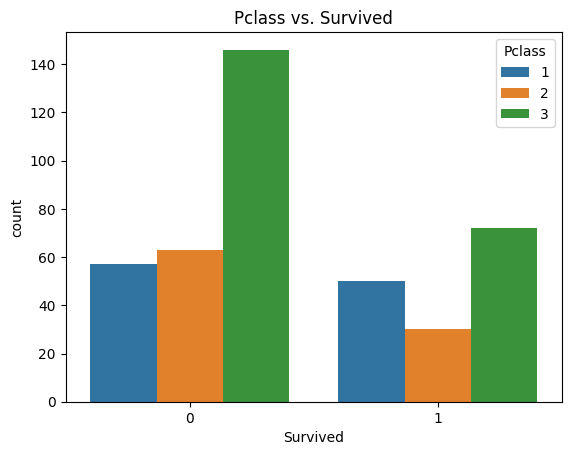

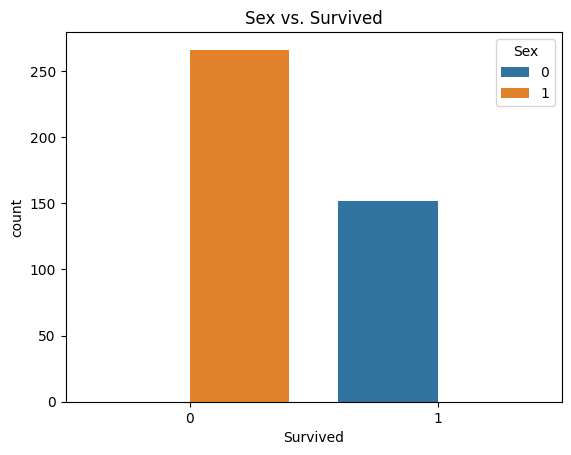

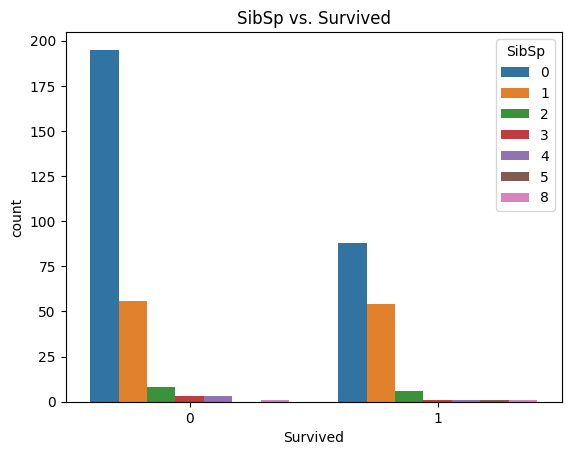

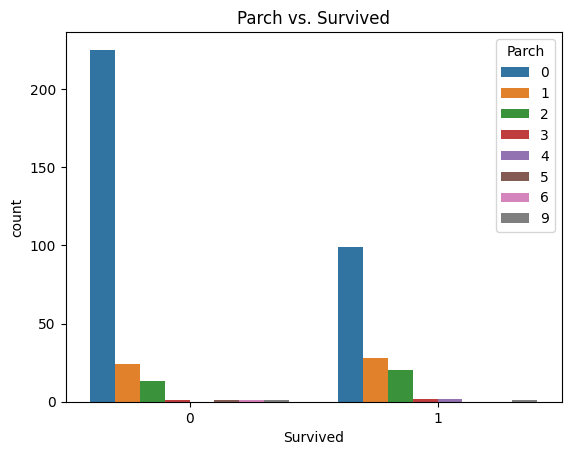

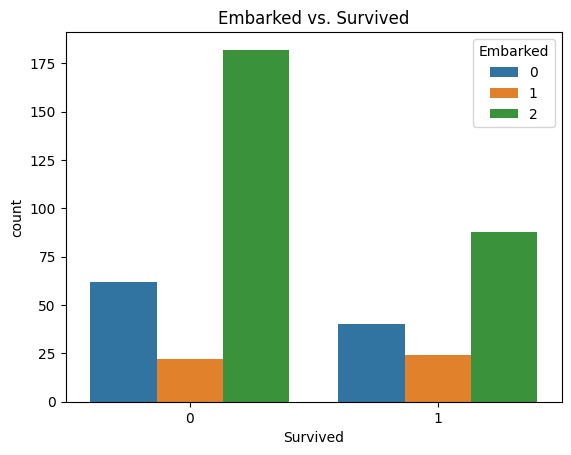

In [76]:
# Visualization: Box plot for numerical features
for feature in categorical_features:
    sns.countplot(x='Survived', hue=feature, data=df)
    plt.title(f'{feature} vs. Survived')
    plt.show()

In [77]:
# Separate features (X) and target variable (y)
X =df.drop('Survived', axis=1)
y =df['Survived']

#Split the data into training and testing sets (70% training, 30% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
#perform k fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

logistic_rgess_model = LogisticRegression(max_iter=1000)
knn_model=KNeighborsClassifier()
svm_model= SVC(max_iter=1000)
random_forest_model=RandomForestClassifier()

best_model=0
model = [ logistic_rgess_model, knn_model, svm_model, random_forest_model]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in model:
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f'{model.__class__.__name__}: {scores.mean()}')
    if(scores.mean() > best_model):
         best_model=scores.mean()
         model_name_class=model
         model_name=model.__class__.__name__
print("best model is ",model_name)

LogisticRegression: 1.0
KNeighborsClassifier: 0.6675272518646013
SVC: 0.6339357429718875
RandomForestClassifier: 1.0
best model is  LogisticRegression


In [79]:
# training and testing the model
model_name_class.fit(X_train, y_train)
model_pred = model_name_class.predict(X_test)

# calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, model_pred)
print("Accuracy of ",model_name," =" ,accuracy)

Accuracy of  LogisticRegression  = 1.0


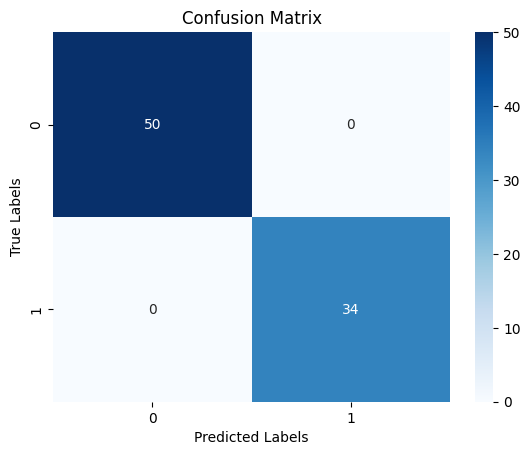

In [80]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix 
cm = confusion_matrix(y_test, model_pred)

# plot the confusion matrix
labels = model_name_class.classes_
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()